# Check joined met file(s)

In [1]:
import xarray as xr
import yaml
import glob
import os
import matplotlib.pyplot as plt

In [4]:
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)
met_path = config.get("met_save_directory")

In [26]:
print("All saved and joined met files:")
os.listdir(met_path)

All saved and joined met files:


['CHINA_Met_201401.nc',
 'CHINA_Met_201402.nc',
 'CHINA_Met_201403.nc',
 'CHINA_Met_201404.nc',
 'CHINA_Met_201405.nc',
 'CHINA_Met_201406.nc',
 'CHINA_Met_201407.nc',
 'CHINA_Met_201408.nc',
 'CHINA_Met_201409.nc',
 'CHINA_Met_201410.nc',
 'CHINA_Met_201411.nc',
 'CHINA_Met_201412.nc',
 'CHINA_Met_201501.nc',
 'CHINA_Met_201502.nc',
 'CHINA_Met_201503.nc',
 'CHINA_Met_201504.nc',
 'CHINA_Met_201505.nc',
 'CHINA_Met_201506.nc',
 'CHINA_Met_201507.nc',
 'CHINA_Met_201508.nc',
 'CHINA_Met_201509.nc',
 'CHINA_Met_201510.nc',
 'CHINA_Met_201511.nc',
 'CHINA_Met_201512.nc',
 'CHINA_Met_201601.nc',
 'CHINA_Met_201602.nc',
 'CHINA_Met_201603.nc',
 'CHINA_Met_201604.nc',
 'CHINA_Met_201605.nc',
 'CHINA_Met_201606.nc',
 'CHINA_Met_201607.nc',
 'CHINA_Met_201608.nc',
 'CHINA_Met_201609.nc',
 'CHINA_Met_201610.nc',
 'CHINA_Met_201611.nc',
 'CHINA_Met_201612.nc',
 'CHINA_Met_201801.nc',
 'CHINA_Met_201802.nc',
 'CHINA_Met_201803.nc',
 'CHINA_Met_201804.nc',
 'CHINA_Met_201805.nc',
 'CHINA_Met_2018

# Plot for a specific met file

In [45]:
filename = os.listdir(met_path)[0]

ds = xr.open_dataset(met_path+filename)

## Plot some variables to check it looks fine

In [19]:
variables = ['x_wind', 'y_wind', 'air_temperature']

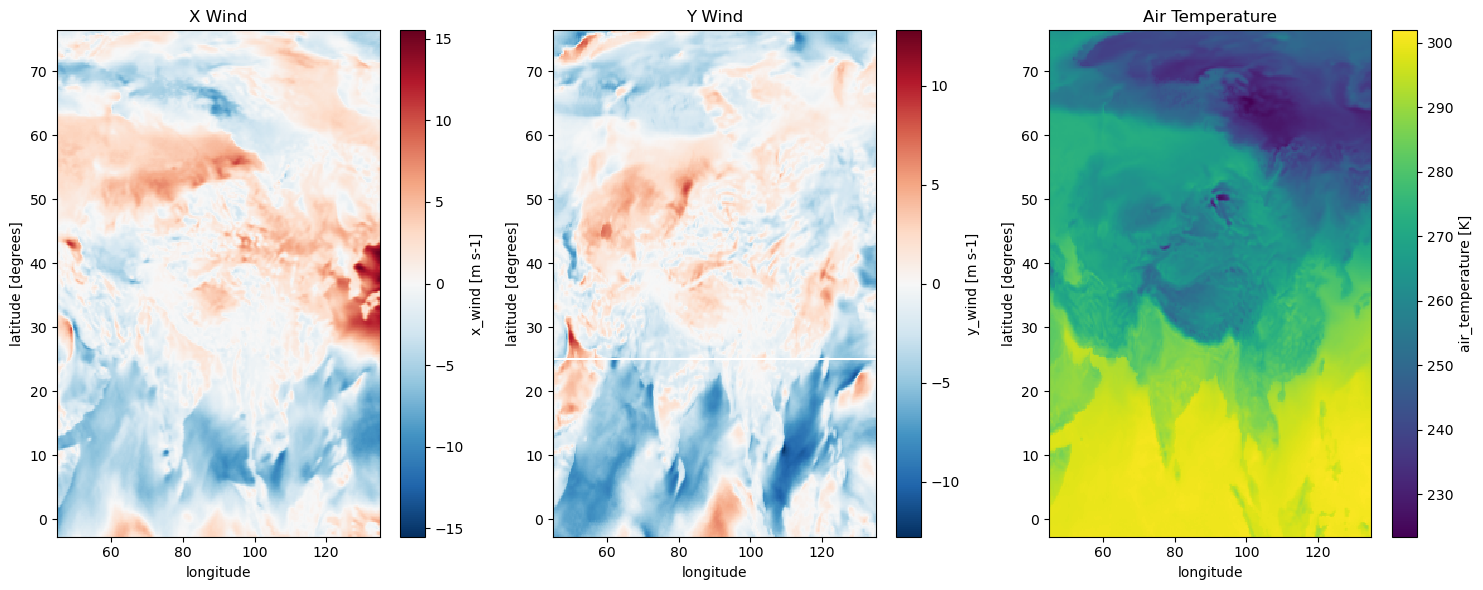

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(5 * len(variables), 6))

# If there's only one subplot, wrap it in a list to keep indexing consistent
if len(variables) == 1:
    axes = [axes]

for i, var in enumerate(variables):
    data = ds[var].isel(model_level_number=0, time=0)  # Adjust these indices if needed
    data.plot(ax=axes[i])
    axes[i].set_title(var.replace('_', ' ').title())

plt.tight_layout()
plt.show()


# Iterate over all available met files

In [17]:
file_pattern = os.path.join(met_path, "CHINA_Met_2014*.nc")

Processing file: CHINA_Met_201401.nc


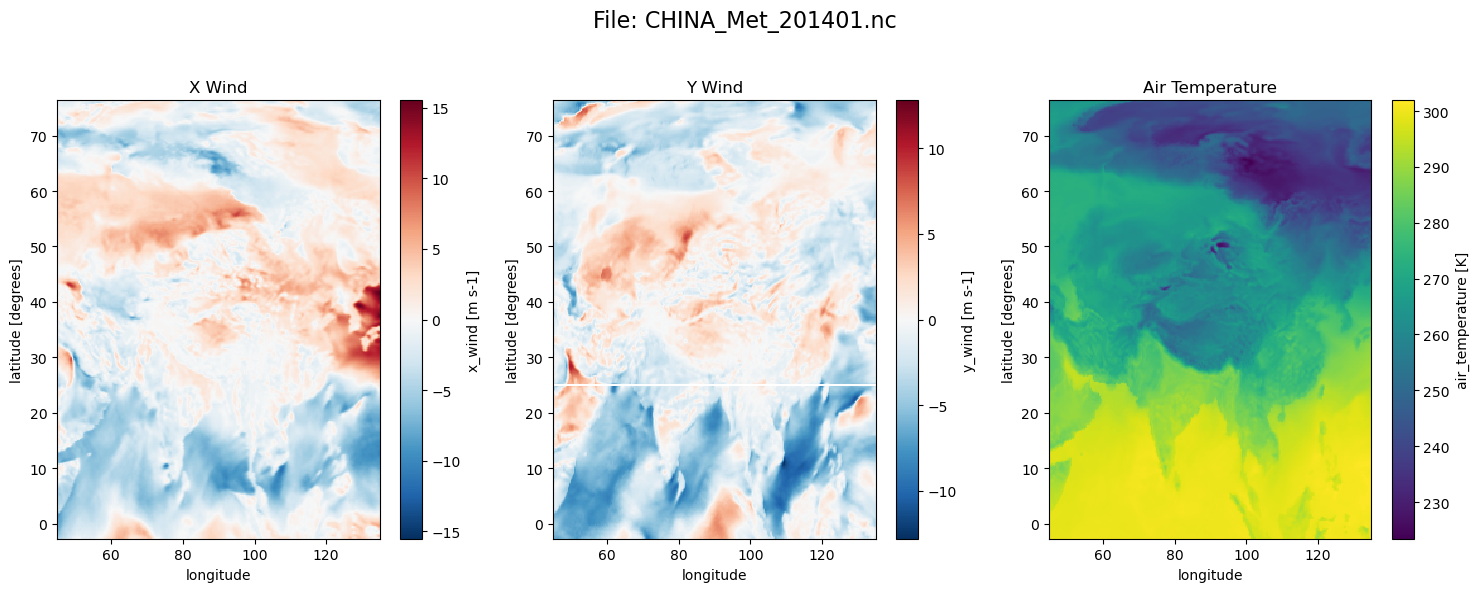

Processing file: CHINA_Met_201402.nc


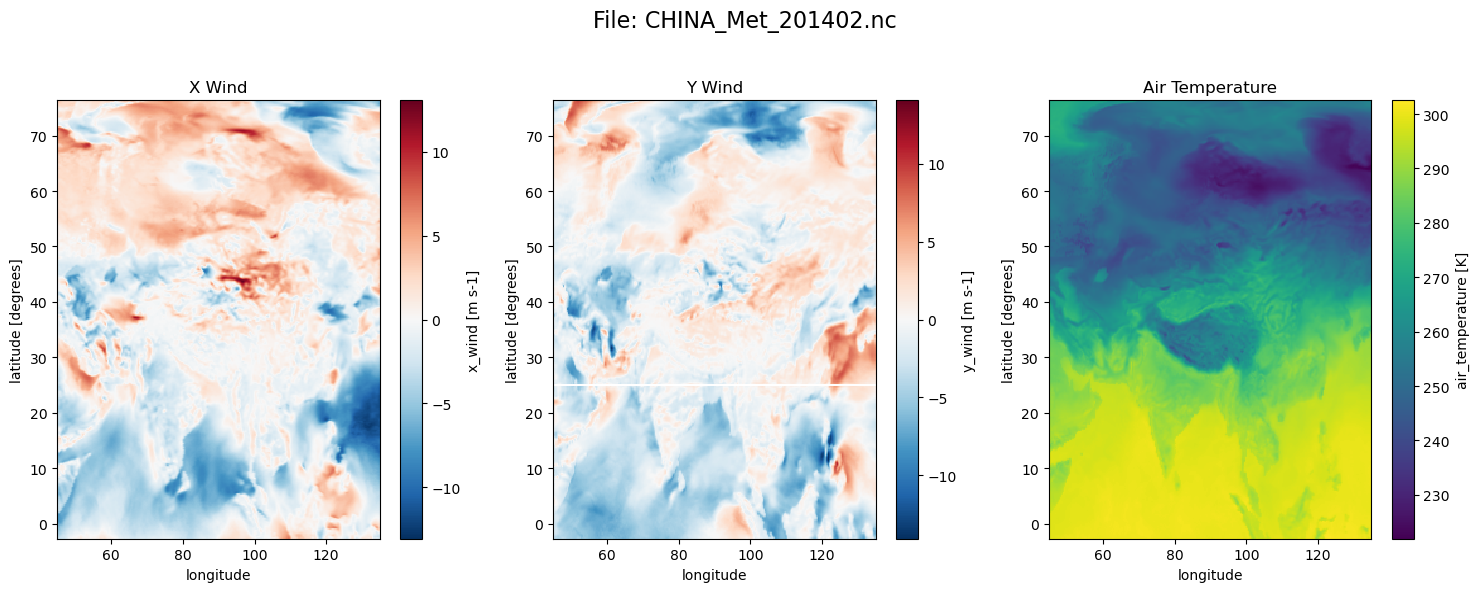

Processing file: CHINA_Met_201403.nc


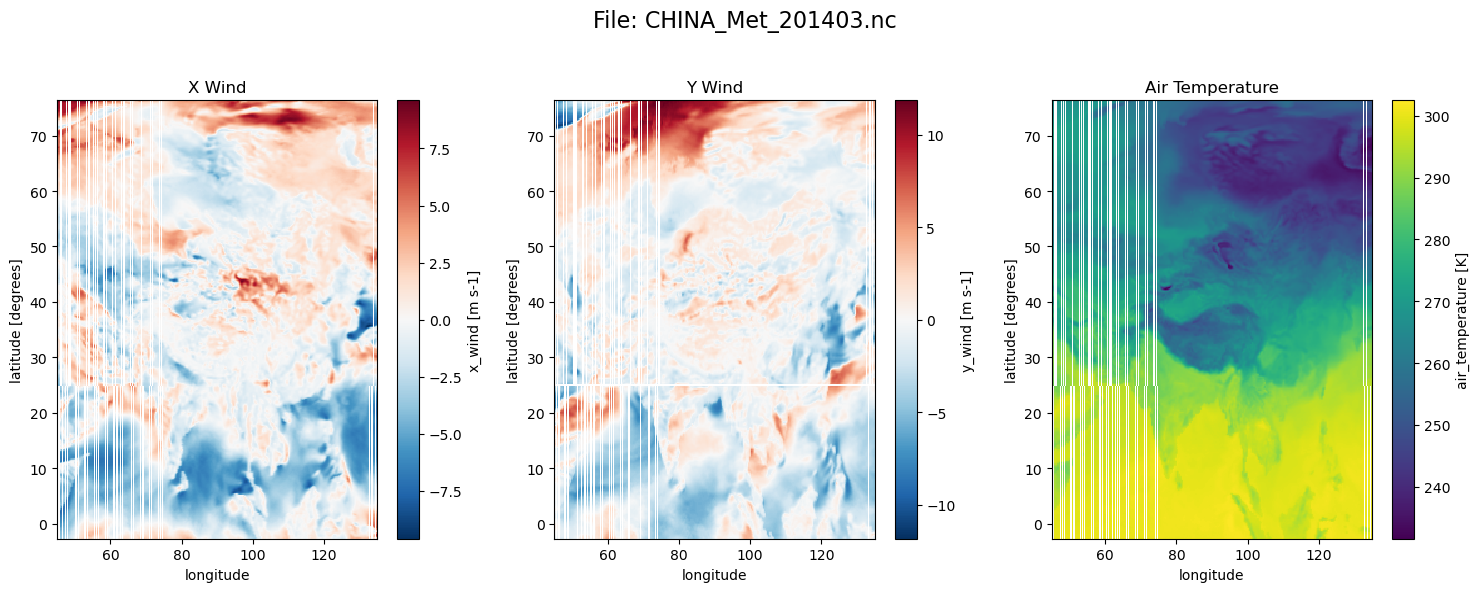

Processing file: CHINA_Met_201404.nc


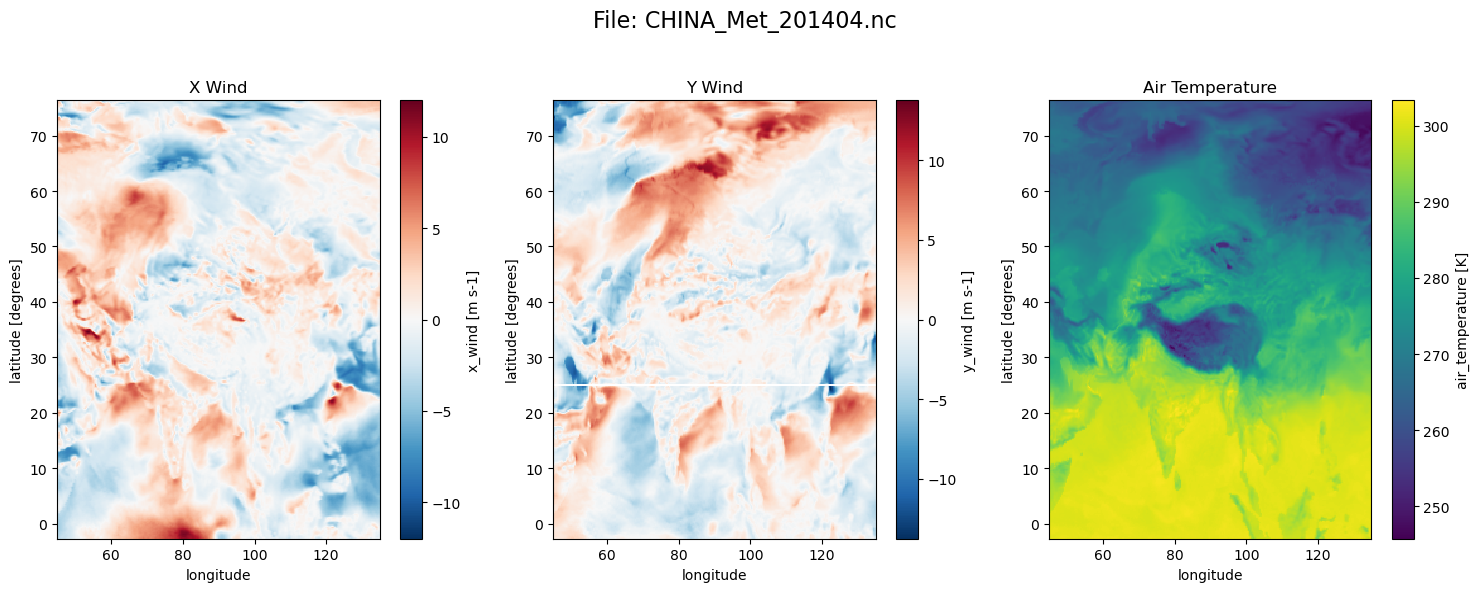

Processing file: CHINA_Met_201405.nc


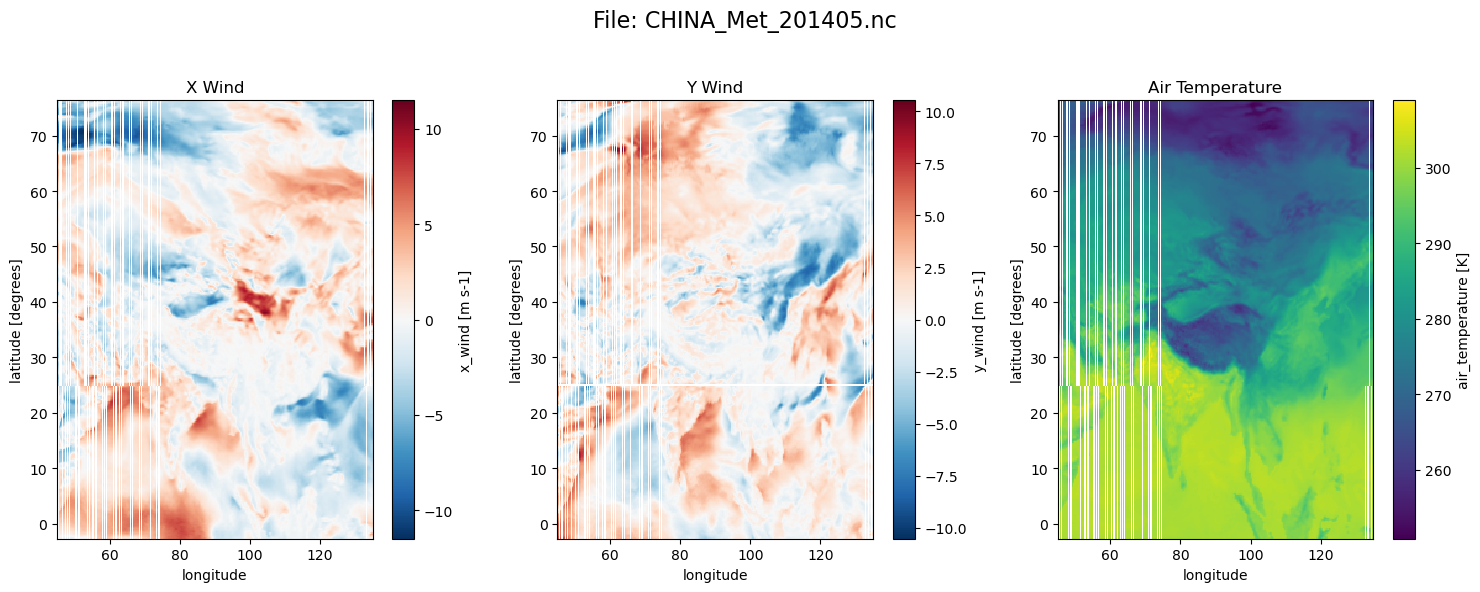

Processing file: CHINA_Met_201406.nc


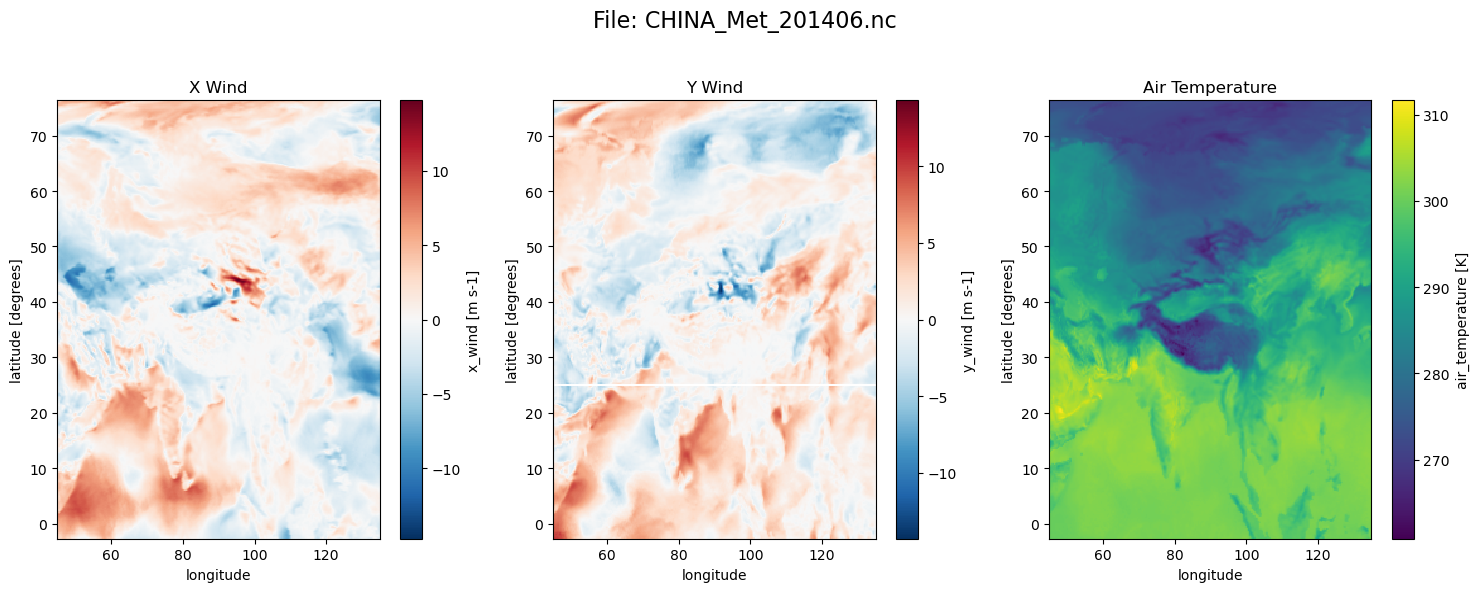

Processing file: CHINA_Met_201407.nc


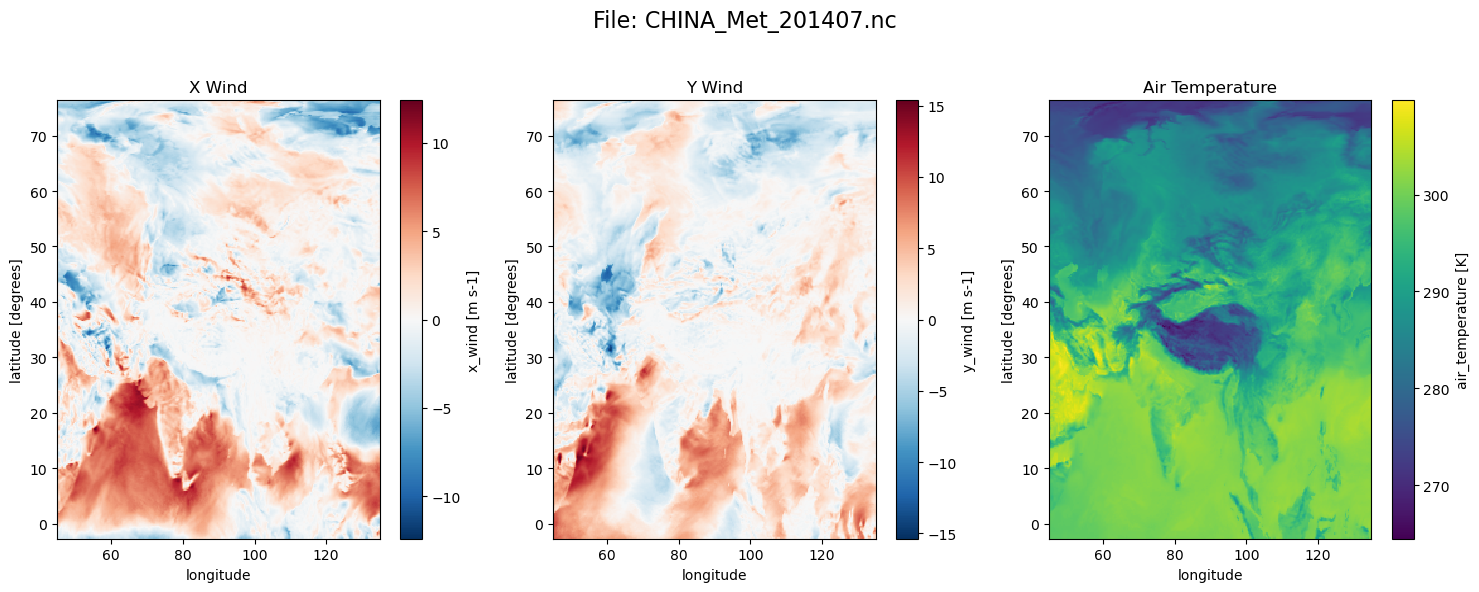

Processing file: CHINA_Met_201408.nc


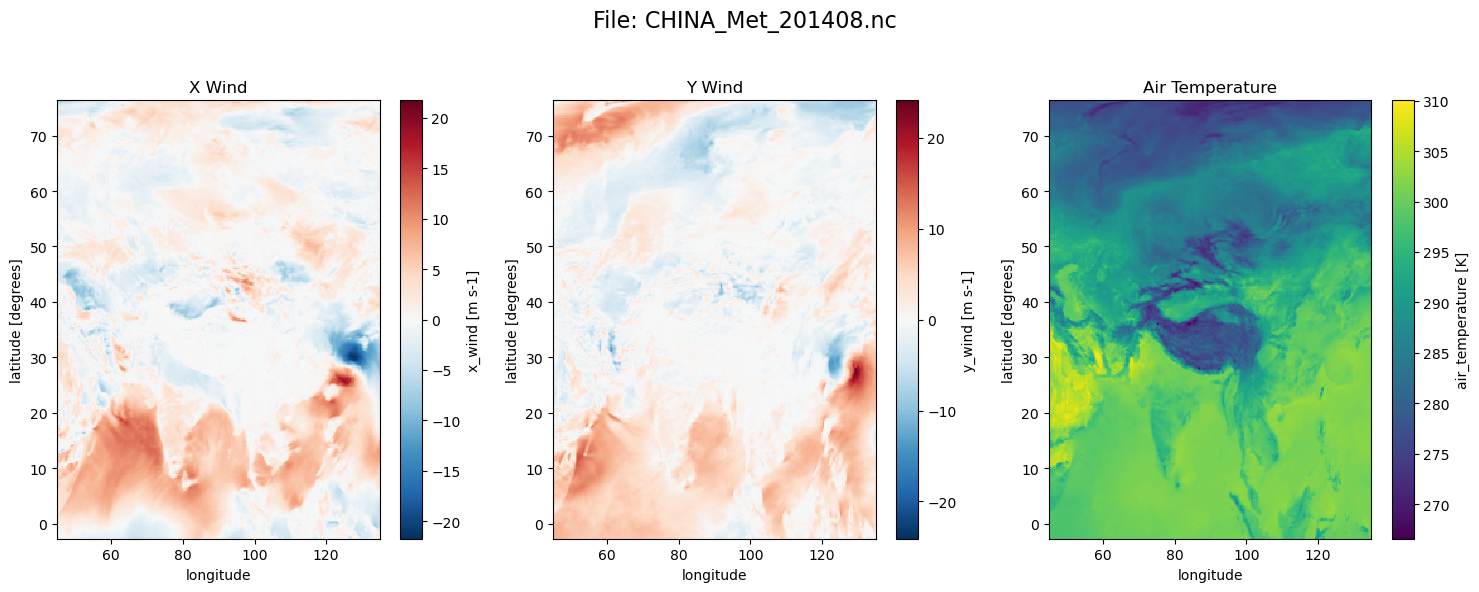

Processing file: CHINA_Met_201409.nc


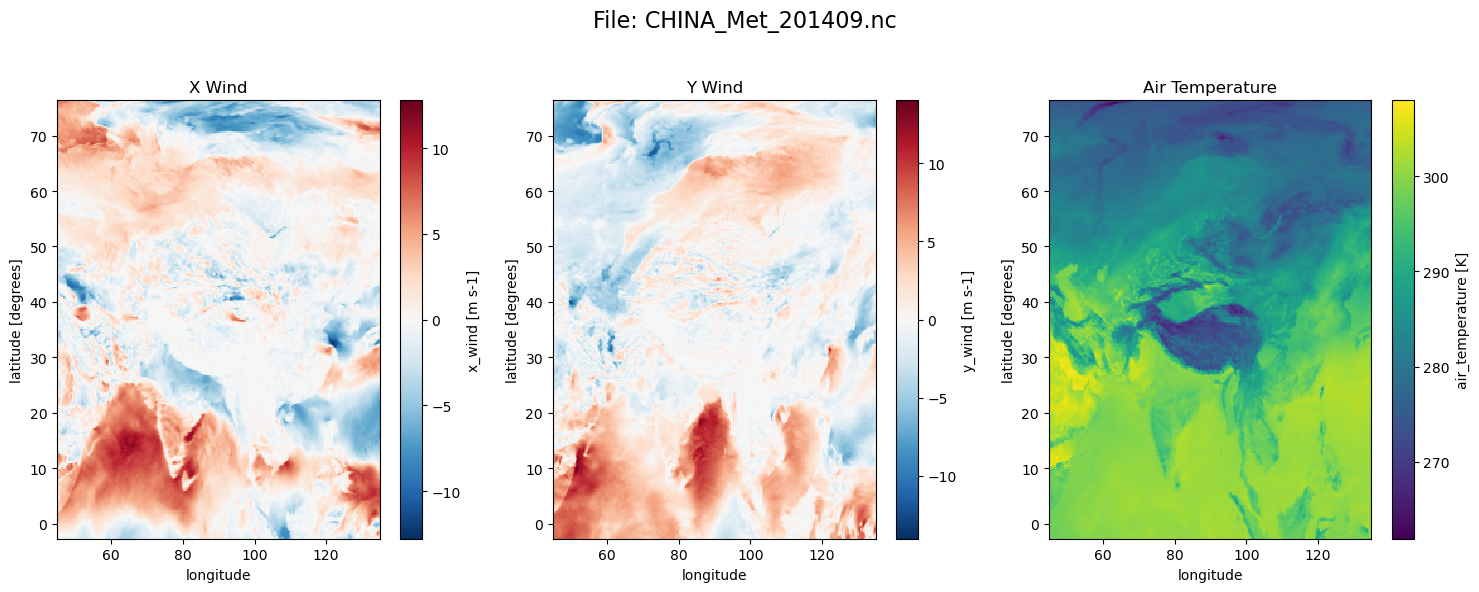

Processing file: CHINA_Met_201410.nc


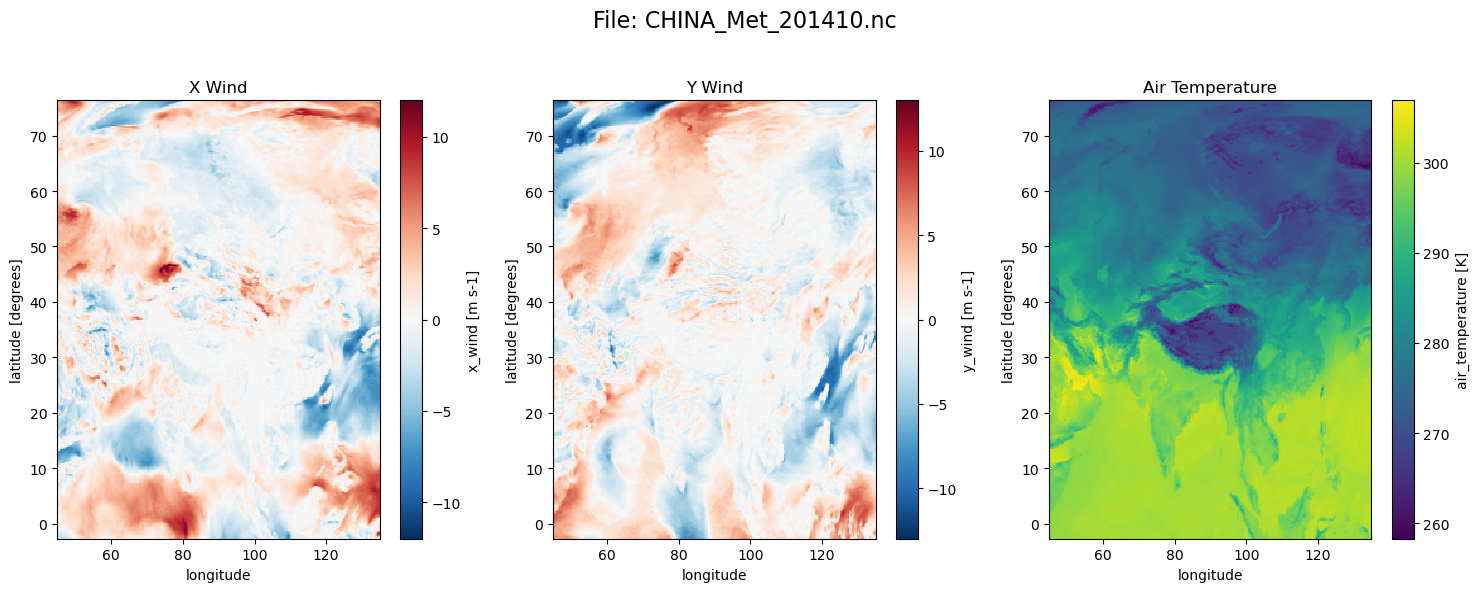

Processing file: CHINA_Met_201411.nc


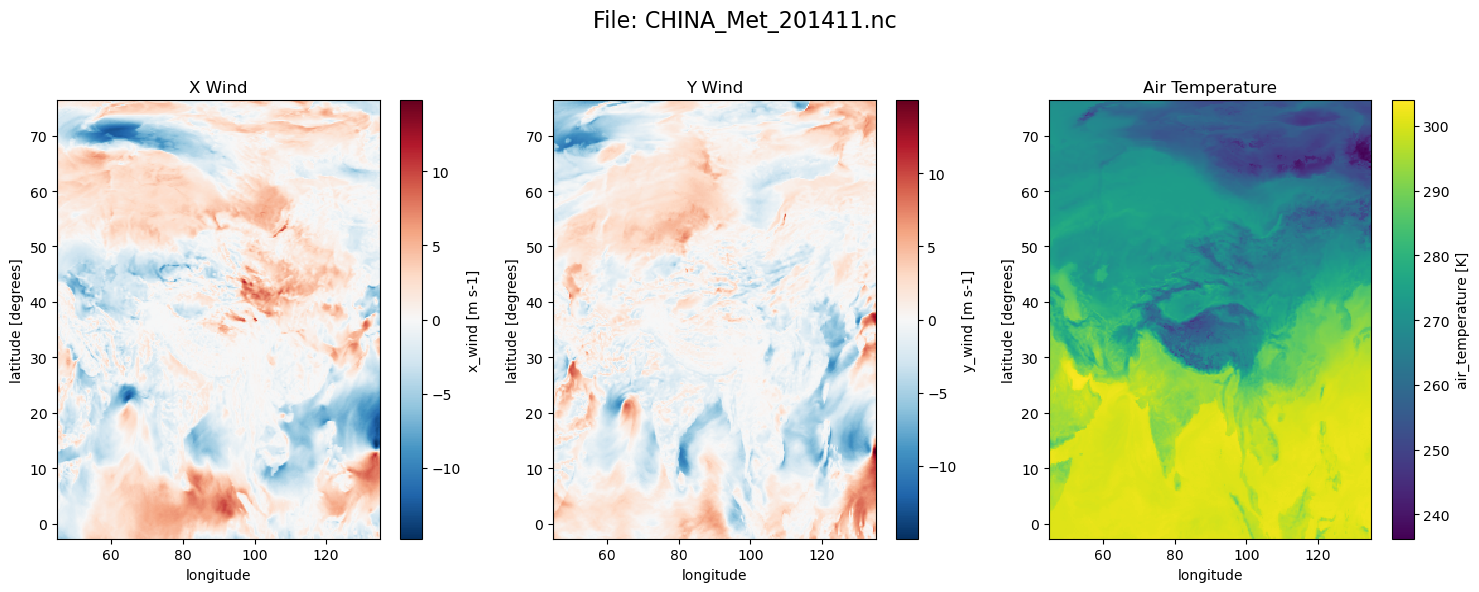

Processing file: CHINA_Met_201412.nc


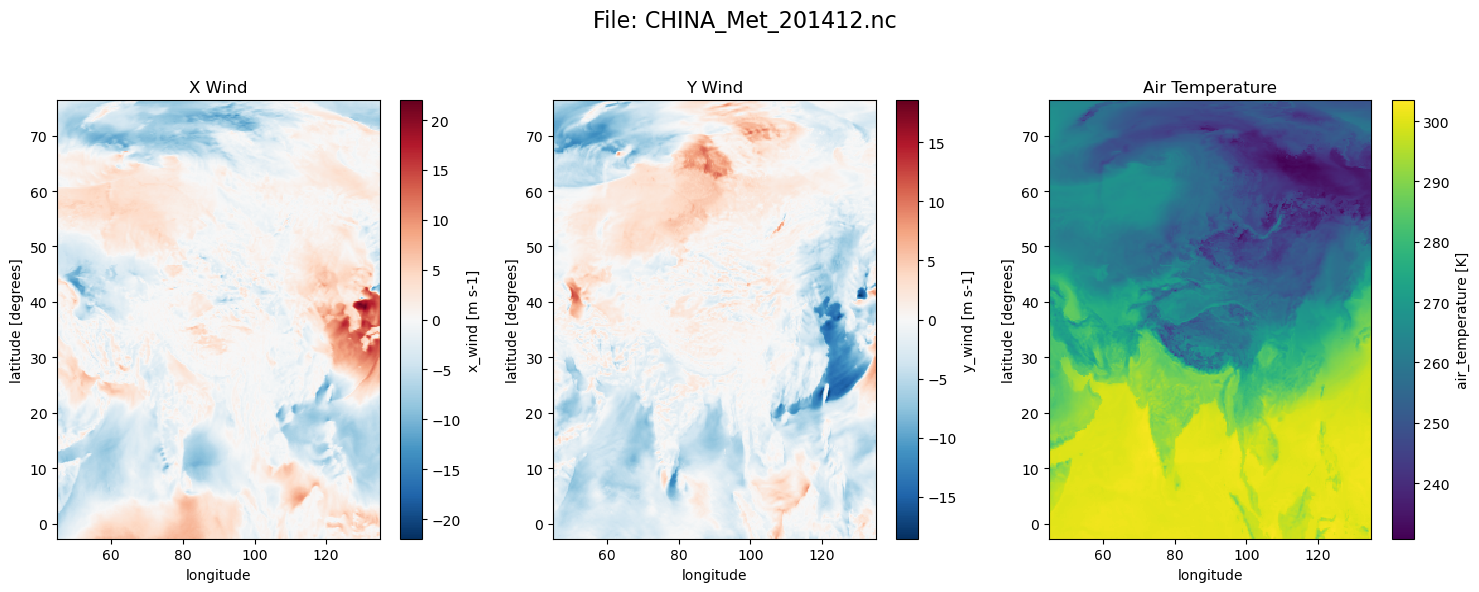

In [20]:
for file_path in glob.glob(file_pattern):
    try:
        ds = xr.open_dataset(file_path)
        
        # Extract filename only for title
        file_name = os.path.basename(file_path)
        print(f"Processing file: {file_name}")

        # Create subplots
        fig, axes = plt.subplots(1, len(variables), figsize=(5 * len(variables), 6))
        if len(variables) == 1:
            axes = [axes]  # Ensure iterable

        for i, var in enumerate(variables):
            if var in ds:
                data = ds[var].isel(model_level_number=0, time=0)  # Adjust slice as needed
                data.plot(ax=axes[i])
                axes[i].set_title(var.replace('_', ' ').title())
            else:
                axes[i].set_visible(False)
                print(f"Variable {var} not found in {file_name}")

        # Add a super-title with the filename
        plt.suptitle(f"File: {file_name}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
        plt.show()

        ds.close()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

In [5]:
# And now check a few of the pre-joined met files
file_path = config.get("scratch_path")
file_pattern = os.path.join(file_path, "files/CHINA_Met_201405*.nc")


Processing file: CHINA_Met_201405_3.nc


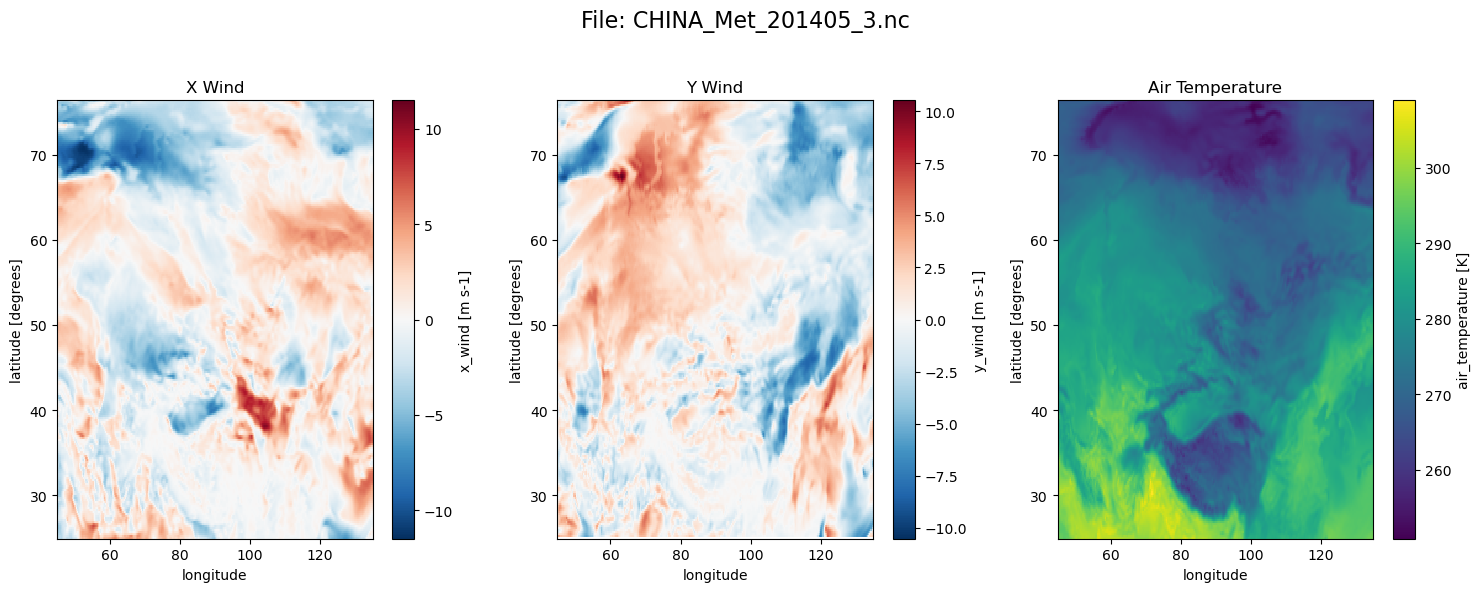

Longitude range: 45.01199658203125 to 134.77199865722656
Processing file: CHINA_Met_201405_4.nc


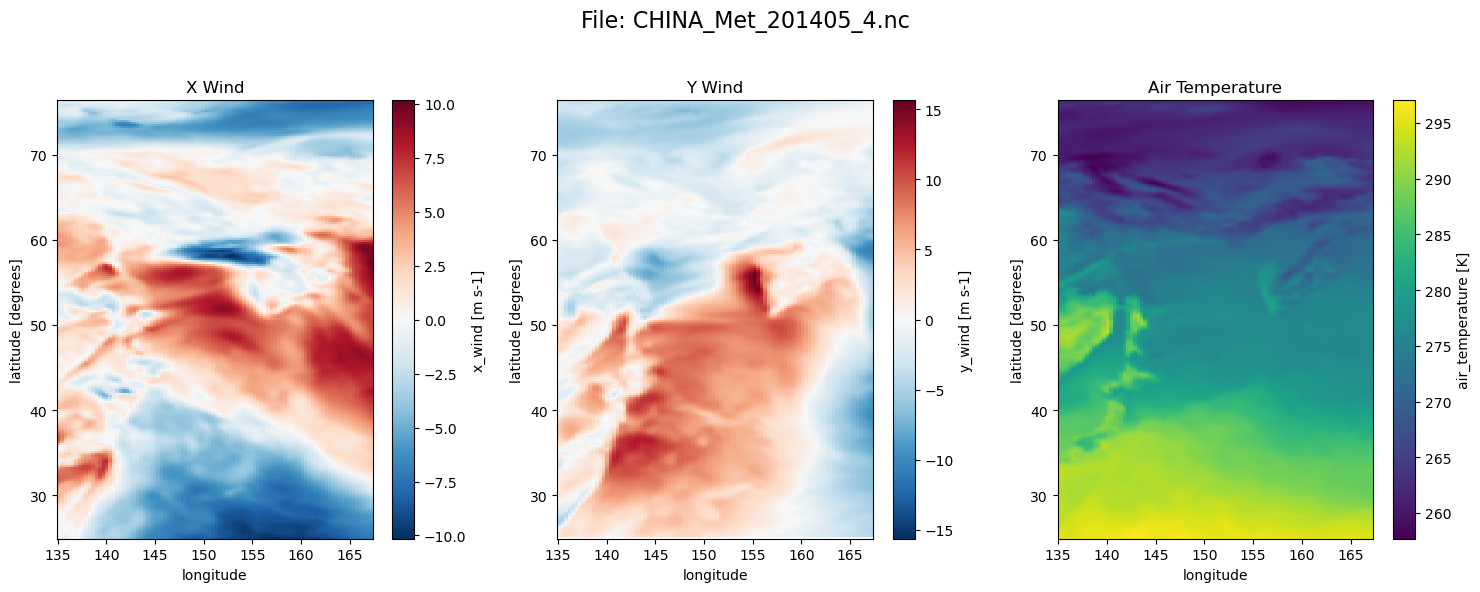

Longitude range: 135.1239986572266 to 167.15599865722658
Processing file: CHINA_Met_201405_8.nc


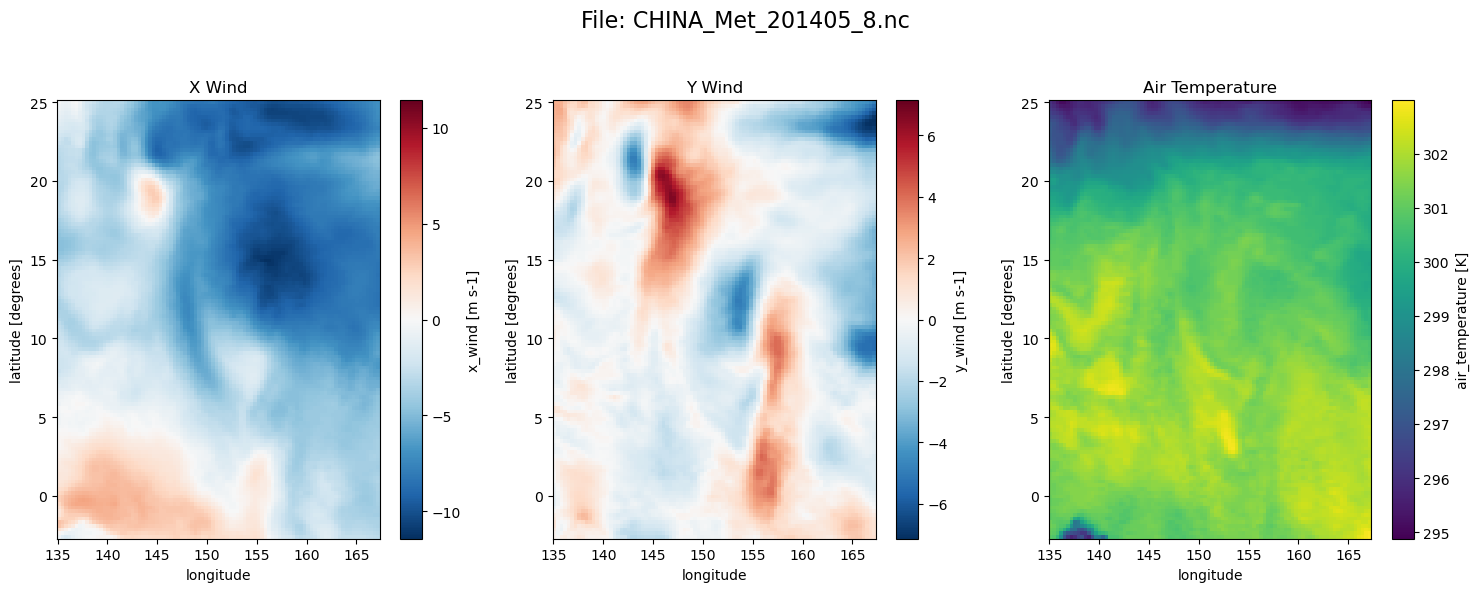

Longitude range: 135.1239986572266 to 167.15599865722658
Processing file: CHINA_Met_201405_7.nc


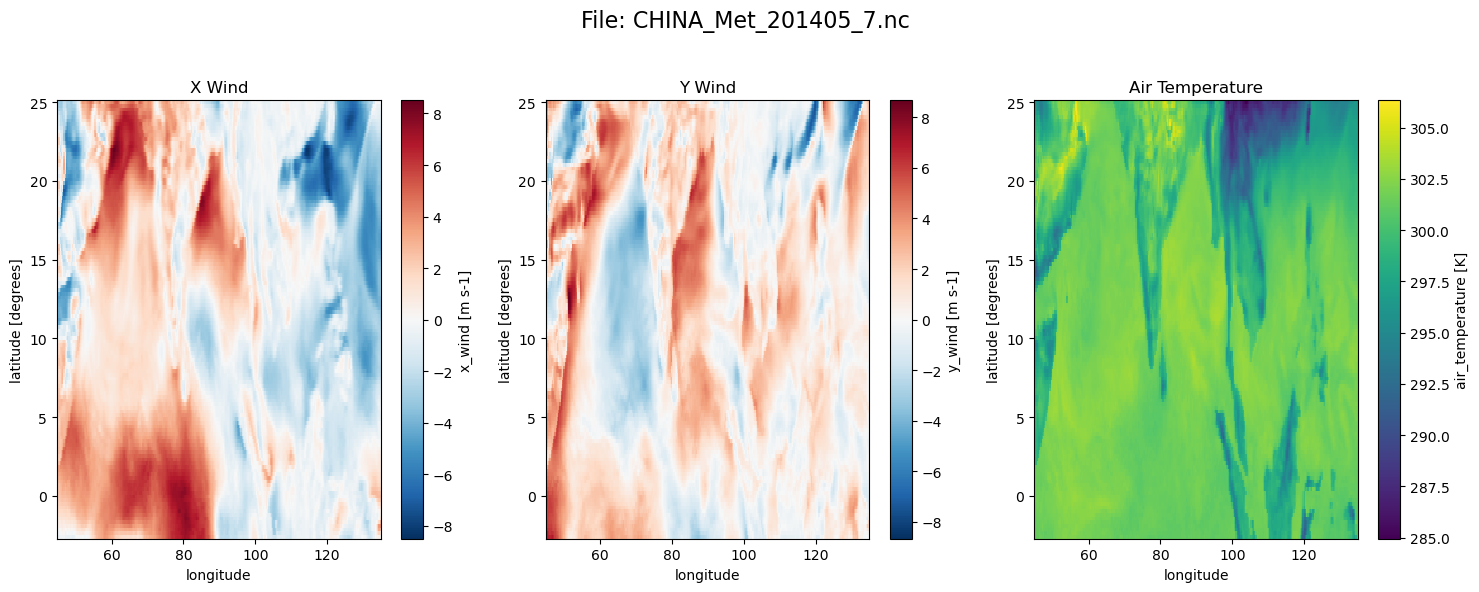

Longitude range: 45.01199658203126 to 134.77199865722656


In [10]:
for file_path in glob.glob(file_pattern):
    try:
        ds = xr.open_dataset(file_path)
        
        # Extract filename only for title
        file_name = os.path.basename(file_path)
        print(f"Processing file: {file_name}")

        # Create subplots
        fig, axes = plt.subplots(1, len(variables), figsize=(5 * len(variables), 6))
        if len(variables) == 1:
            axes = [axes]  # Ensure iterable

        for i, var in enumerate(variables):
            if var in ds:
                data = ds[var].isel(model_level_number=0, time=0)  # Adjust slice as needed
                data.plot(ax=axes[i])
                axes[i].set_title(var.replace('_', ' ').title())
            else:
                axes[i].set_visible(False)
                print(f"Variable {var} not found in {file_name}")

        # Add a super-title with the filename
        plt.suptitle(f"File: {file_name}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
        plt.show()

        lon_min = ds.longitude.min().item()
        lon_max = ds.longitude.max().item()

        print(f"Longitude range: {lon_min} to {lon_max}")

        ds.close()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Recreate joining

In [29]:
domain = "CHINA"

if domain == "CHINA":
    region_pairs = {(3, 8): 'not_connected',
    (3, 7): 'latitude',
    (3, 4): 'longitude',
    (4, 8): 'longitude',
    (7, 8): 'latitude',
    (7, 4): 'not_connected'}   


from met_functions import *

region_bounds = get_saved_region_bounds()
file_path = config.get("scratch_path")
file_pattern = os.path.join(file_path, "files/CHINA_Met_201405")

print(file_pattern)
print(file_path)


/work/scratch-nopw2/jeff/files/CHINA_Met_201405
/work/scratch-nopw2/jeff/


In [31]:
for lat_pair in [k for k,v in region_pairs.items() if v == "latitude"]:
    with  xr.open_dataset(file_pattern+"_"+str(lat_pair[0])+".nc") as var1:
        with xr.open_dataset(file_pattern+"_"+str(lat_pair[1])+".nc") as var2:
            print("var1:", lat_pair[0])
            print("var2:", lat_pair[1])

            print("loaded both datasets, merging")
            var1 = var1.sel(latitude=slice(region_bounds[lat_pair[0]][0], region_bounds[lat_pair[0]][1]), longitude=slice(region_bounds[lat_pair[0]][2], region_bounds[lat_pair[0]][3]))
            var2 = var2.sel(latitude=slice(region_bounds[lat_pair[1]][0], region_bounds[lat_pair[1]][1]), longitude=slice(region_bounds[lat_pair[1]][2], region_bounds[lat_pair[1]][3]))
            print("Var1 longitude duplicates:", var1.longitude.to_series().duplicated().any())
            print("Var2 longitude duplicates:", var2.longitude.to_series().duplicated().any())

            duplicates_1 = var1.longitude.to_series()[var1.longitude.to_series().duplicated()]
            
            # Remove exact duplicates to avoid printing the same value multiple times
            unique_duplicates_1 = duplicates_1.drop_duplicates()
            
            print("Duplicated longitude values in var1:")
            print(unique_duplicates_1)


            duplicates_2 = var2.longitude.to_series()[var2.longitude.to_series().duplicated()]
            
            # Remove exact duplicates to avoid printing the same value multiple times
            unique_duplicates_2 = duplicates_2.drop_duplicates()
            
            print("Duplicated longitude values in var2:")
            print(unique_duplicates_2)

            '''
            var1 = var1.isel(longitude=~var1.longitude.to_series().duplicated())
            var2 = var2.isel(longitude=~var2.longitude.to_series().duplicated())
            print("Var1 longitude duplicates:", var1.longitude.to_series().duplicated().any())
            print("Var2 longitude duplicates:", var2.longitude.to_series().duplicated().any())
            merged = xr.concat([var1, var2], dim="latitude")
            merged = merged.sortby("latitude")
            merged = merged.drop_duplicates(dim="latitude")
            lat_arrays.append(merged)
            print(lat_pair, "merged")
            print(merged)
            print(np.sum(np.isnan(merged.x_wind[0,:,:,0].values)))
            '''
                

var1: 3
var2: 7
loaded both datasets, merging
Var1 longitude duplicates: True
Var2 longitude duplicates: True
Duplicated longitude values in var1:
longitude
75.283997      75.283997
132.307999    132.307999
Name: longitude, dtype: float64
Duplicated longitude values in var2:
longitude
75.283997      75.283997
132.307999    132.307999
Name: longitude, dtype: float64
var1: 7
var2: 8
loaded both datasets, merging
Var1 longitude duplicates: True
Var2 longitude duplicates: False
Duplicated longitude values in var1:
longitude
75.283997      75.283997
132.307999    132.307999
Name: longitude, dtype: float64
Duplicated longitude values in var2:
Series([], Name: longitude, dtype: float64)
